In [117]:
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("../../data/github-organizations.csv")

In [119]:
df.head(5)

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,NaN
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


In [120]:
# Graph creation and sampling
sample_size = 50
G = nx.from_pandas_edgelist(df.sample(sample_size, random_state=51), source="Organisation", target="member")

# Visualisations

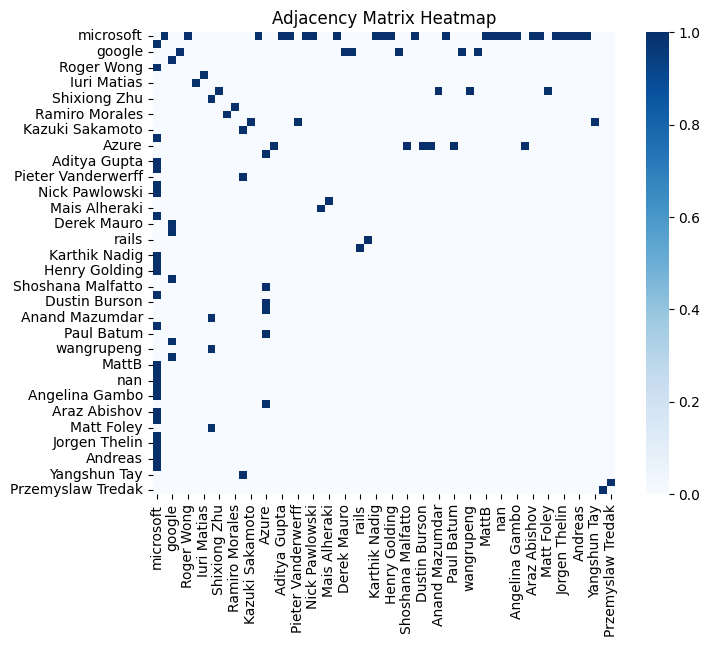

In [121]:
nodes = list(G.nodes())
adj_df = pd.DataFrame(A.toarray(), index=nodes, columns=nodes)

plt.figure(figsize=(8, 6))
sns.heatmap(adj_df, cmap="Blues", annot=False, square=True, cbar=True)
plt.title("Adjacency Matrix Heatmap")
plt.show()

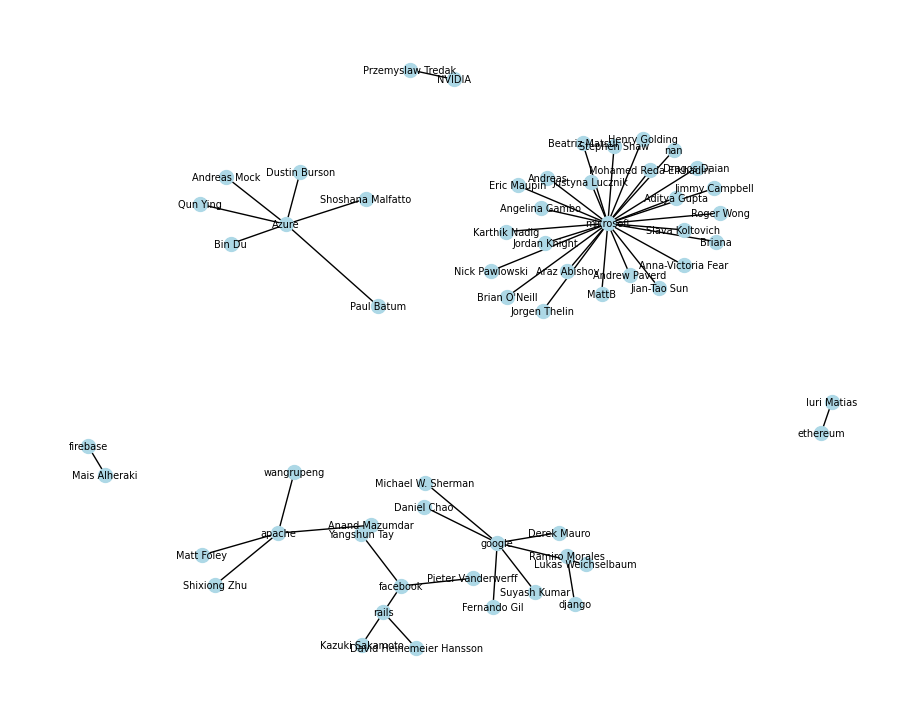

In [122]:
# Graph plot
pos_spring = nx.spring_layout(G, k=0.3, iterations=50, seed=11)

plt.figure(figsize=(9, 7))
nx.draw(G, pos_spring, with_labels=True, node_color="lightblue", node_size=100, font_size=7)
plt.show()

# Network/node parameter calculation

In [153]:
# Graph creation without sampling
G = nx.from_pandas_edgelist(df, source="Organisation", target="member")

##---NODE PARAMETERS---


# Degrees
print(f"Degrees: {len(G.degree)}")
degrees = dict(G.degree())

df_degrees = pd.DataFrame(list(degrees.items()), columns=["Node", "Degree"])
df_degrees.to_csv("../../data/output/node_degrees.csv", index=False)

# Distance


#Closeness
closeness = nx.closeness_centrality(G)
# print(f"Closeness: {closeness}")
df_closeness = pd.DataFrame(list(closeness.items()), columns=["Node", "Degree"])
df_closeness.to_csv("../../data/output/node_closeness.csv", index=False)

# Betweenness
betweenness = nx.betweenness_centrality(G)
#print(f"Betweenness: {betweenness}")
df_betweenness = pd.DataFrame(list(betweenness.items()), columns=["Node", "Degree"])
df_betweenness.to_csv("../../data/output/node_betweenness.csv", index=False)

# Clustering coeficients
clustering = nx.clustering(G)
print(f"Clustering {clustering}")
df_clustering = pd.DataFrame(list(clustering.items()), columns=["Node", "Degree"])
df_clustering.to_csv("../../data/output/node_clustering.csv", index=False)

##---NETWORK PARAMETERS---
print("\n\n")

#Diameter
dameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(f"Diameter: {dameter}")

# Cliques
cliques = list(nx.find_cliques(G))
print(f"Number of cliques: {len(cliques)}")
#print(cliques)

# Clustering coeficients
avg_clustering = nx.average_clustering(G)
print(f"Averaga Clustering {avg_clustering}")

# Modularity
modularity = nx.modularity_matrix(G)
print(f"Modularity: \n{modularity}")

Degrees: 8920



Number of cliques: 9656
Averaga Clustering 0.0
Modularity: 
[[-2.83554267e-01  9.96168186e-01  8.96541011e-01 ... -3.83181442e-03
  -3.83181442e-03 -3.83181442e-03]
 [ 9.96168186e-01 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [ 8.96541011e-01 -1.39809445e-03 -3.77485501e-02 ... -1.39809445e-03
  -1.39809445e-03 -1.39809445e-03]
 ...
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]]
